In [2]:
! pip install -q gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 87.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.3 MB/s eta 0:00:00


In [4]:
! unzip retina_model.zip > /dev/null

In [42]:
import torch
from transformers import SegformerForSemanticSegmentation, AutoModelForSemanticSegmentation, SegformerImageProcessor
import torch.nn as nn
from PIL import Image
import numpy as np
import gradio as gr
from skimage.io import*

In [16]:
model = SegformerForSemanticSegmentation.from_pretrained("/content/retina_model")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device);
print(device)

cpu


In [126]:
import numpy as np
label2color = {
    label: (np.random.randint(0, 1), np.random.randint(0, 255), np.random.randint(0, 255))
    for label in range(150)  # 150 classes in ADE20K
}

In [127]:
def visualize_instance_seg_mask(mask):
    image = np.zeros((mask.shape[0], mask.shape[1], 3))
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            image[i, j, :] = label2color[mask[i, j]]
    image = image / 255
    return image

In [128]:
image_processor = SegformerImageProcessor(do_reduce_labels=False)

def perform_inference(img: np.array):
    target_size = (img.shape[0], img.shape[1])
    inputs = image_processor(images=img, return_tensors="pt")
    inputs = inputs.to(device)
    with torch.no_grad():
        outp = model(**inputs)
    predicted_segmentation_map = image_processor.post_process_semantic_segmentation(outputs=outp, target_sizes=[target_size])[0]
    predicted_segmentation_map = predicted_segmentation_map.cpu().detach().numpy()
    #predicted_segmentation_map = predicted_segmentation_map.astype(np.uint32)
    seg_map =predicted_segmentation_map
    seg_map = visualize_instance_seg_mask(seg_map)
    return seg_map

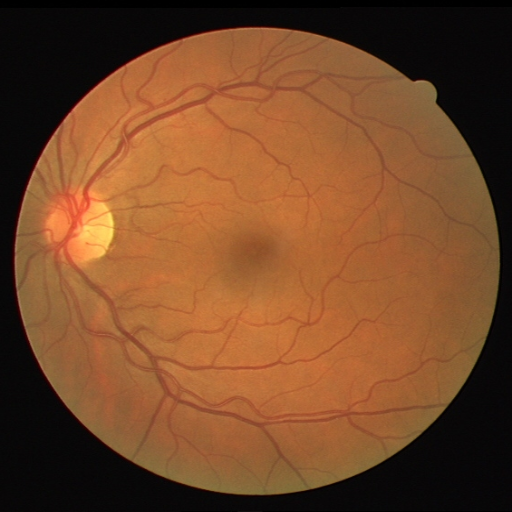

In [78]:
sample_input = Image.open("/content/0.png")
sample_input

In [37]:
import matplotlib.pyplot as plt


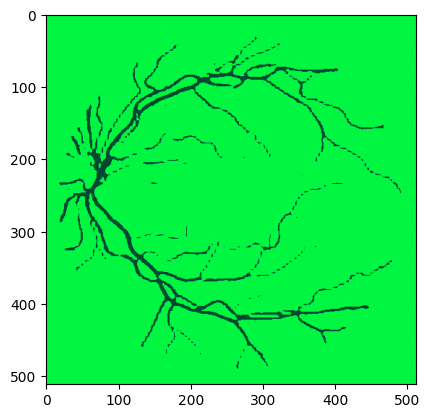

In [129]:
seg_map = perform_inference(np.array(sample_input))
plt.imshow(seg_map)

In [130]:
iface = gr.Interface(
    fn=perform_inference,
    inputs=[gr.Image()],
    outputs=[gr.Image()],
    title="Segformer-RetinaNet",
    description="Segmentation of Retina Vessels"
)

iface.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://edf655ef7f8c8edfce.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://edf655ef7f8c8edfce.gradio.live


In [131]:
iface.close()

Closing server running on port: 7860


TypeError: Image data of dtype <U18 cannot be converted to float

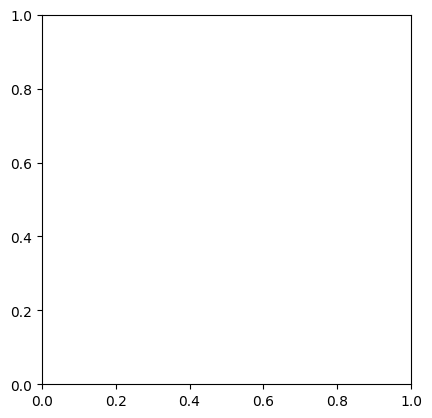

In [112]:
plt.imshow('/content/image.png')

In [113]:
mask = imread('/content/image.png')

In [114]:
np.unique(mask)

array([0, 1], dtype=uint8)

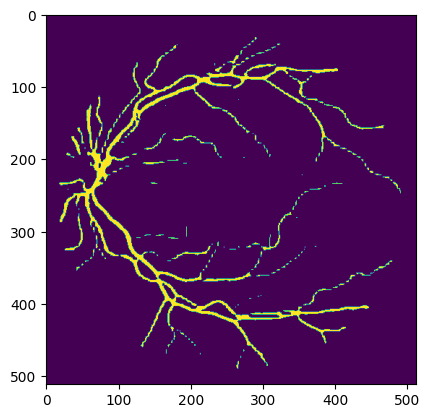

In [115]:
plt.imshow(mask)